## Average Temperature

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

In [5]:
temp = np.array(data_temp['tas'])
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))
temp_annual_mean = temp_reduced.reshape(-1, 1).flatten()

# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1884, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Temperature': temp_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')


print(df)

      Temperature      Class
Year                        
1884     6.950380   pre_1990
1884     6.604088   pre_1990
1884     5.954602   pre_1990
1884     6.962700   pre_1990
1884     6.361767   pre_1990
...           ...        ...
2022     9.321733  post_1990
2022    10.583754  post_1990
2022    11.064243  post_1990
2022    10.834170  post_1990
2022     8.720055  post_1990

[237182 rows x 2 columns]


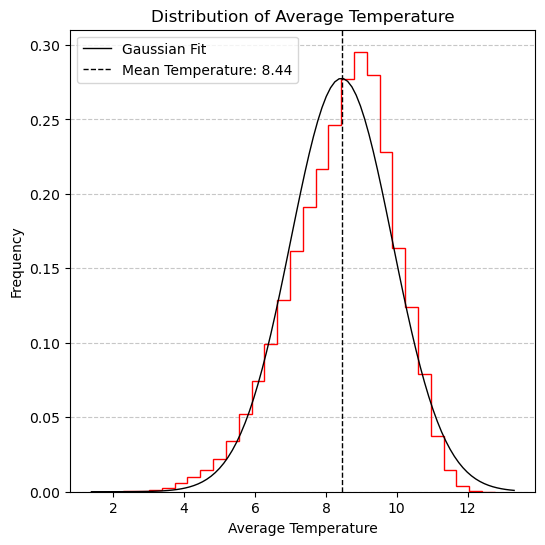

In [25]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Temperature'])

plt.figure(figsize=(6, 6))
plt.hist(df['Temperature'], bins=30, density=True, edgecolor='red', histtype='step')

mu, std = norm.fit(df['Temperature'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')

plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Temperature: {mean:.2f}')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

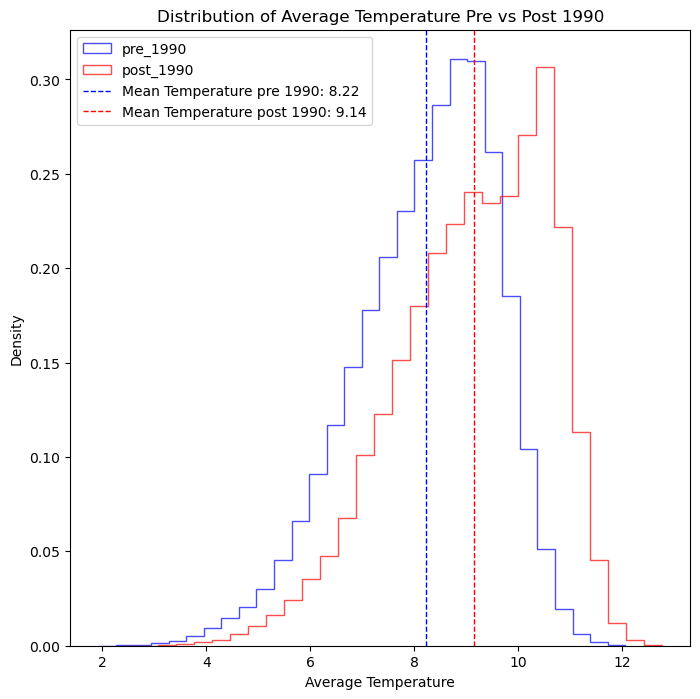

In [28]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Temperature']
post_1990_data = df[df['Class'] == 'post_1990']['Temperature']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Temperature pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Temperature post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Temperature Pre vs Post 1990')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.legend()

plt.show()

## Average Maximum Temperature

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)

In [5]:
temp = np.array(data_temp['tasmax'])
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))
temp_annual_mean = temp_reduced.reshape(-1, 1).flatten()

# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1884, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Temperature': temp_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

print(df)

      Temperature      Class
Year                        
1884    10.900596   pre_1990
1884    10.432849   pre_1990
1884     9.636578   pre_1990
1884     9.609509   pre_1990
1884     9.031652   pre_1990
...           ...        ...
2022    13.045972  post_1990
2022    14.600538  post_1990
2022    15.244807  post_1990
2022    14.879905  post_1990
2022    12.152005  post_1990

[237160 rows x 2 columns]


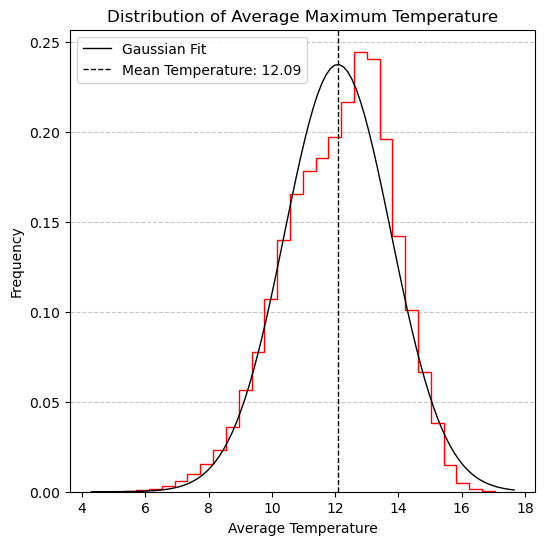

In [8]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Temperature'])

plt.figure(figsize=(6, 6))
plt.hist(df['Temperature'], bins=30, density=True, edgecolor='red', histtype='step')

mu, std = norm.fit(df['Temperature'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')

plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Temperature: {mean:.2f}')
plt.title('Distribution of Average Maximum Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper left'))
plt.show()

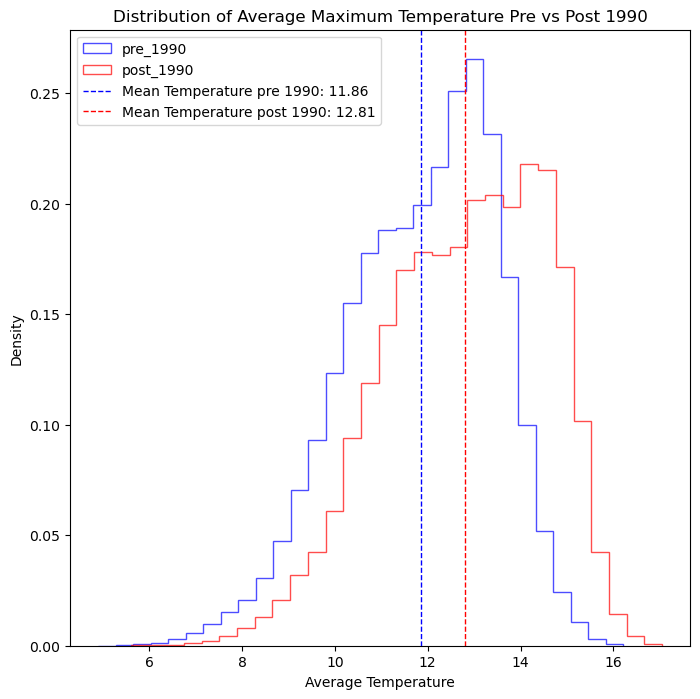

In [9]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Temperature']
post_1990_data = df[df['Class'] == 'post_1990']['Temperature']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Temperature pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Temperature post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Maximum Temperature Pre vs Post 1990')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.legend()

plt.show()

## Average Minimum Temperature

In [10]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)

In [11]:
temp = np.array(data_temp['tasmin'])
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))
temp_annual_mean = temp_reduced.reshape(-1, 1).flatten()

# Assuming temp, temp_max, and temp_min have shape (num_years, x, y)
num_years_temp, x, y = temp.shape

# Create an array of years to match the reshaped temperature arrays
years_expanded = np.repeat(np.arange(1884, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Temperature': temp_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

print(df)

      Temperature      Class
Year                        
1884     3.138283   pre_1990
1884     2.901733   pre_1990
1884     2.450827   pre_1990
1884     4.750815   pre_1990
1884     4.420964   pre_1990
...           ...        ...
2022     5.536837  post_1990
2022     6.504058  post_1990
2022     6.879631  post_1990
2022     6.772055  post_1990
2022     5.342153  post_1990

[237188 rows x 2 columns]


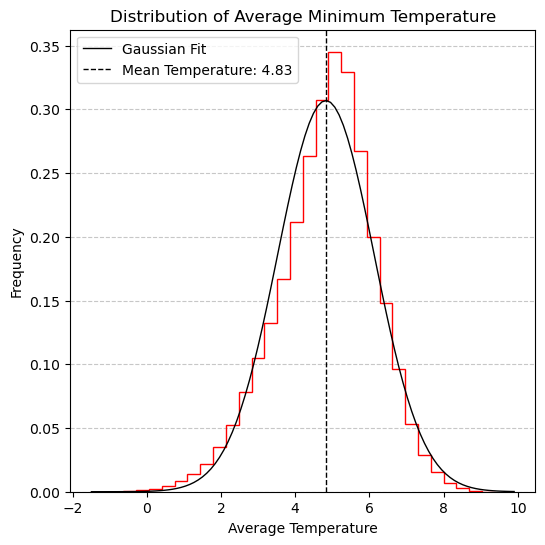

In [12]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Temperature'])

plt.figure(figsize=(6, 6))
plt.hist(df['Temperature'], bins=30, density=True, edgecolor='red', histtype='step')

mu, std = norm.fit(df['Temperature'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')

plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Temperature: {mean:.2f}')
plt.title('Distribution of Average Minimum Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper left'))
plt.show()

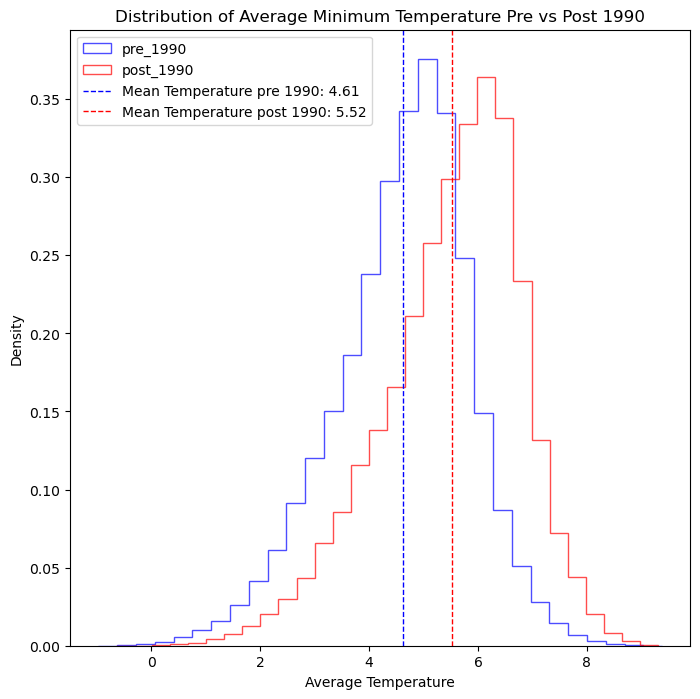

In [13]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Temperature']
post_1990_data = df[df['Class'] == 'post_1990']['Temperature']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Temperature pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Temperature post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Minimum Temperature Pre vs Post 1990')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.legend()

plt.show()

## Average Rainfall

In [17]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

In [19]:
rain = np.array(data['rainfall'])
rain_reduced = block_reduce(rain, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain))
rain_annual_mean = rain_reduced.reshape(-1, 1).flatten()

num_years_rain, x, y = rain.shape

years_expanded = np.repeat(np.arange(1836, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Rainfall': rain_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

print(df)

        Rainfall      Class
Year                       
1836   79.887439   pre_1990
1836  108.386798   pre_1990
1836  135.876529   pre_1990
1836  221.628963   pre_1990
1836  223.317482   pre_1990
...          ...        ...
2022   87.214615  post_1990
2022   66.415111  post_1990
2022   50.194614  post_1990
2022   54.249056  post_1990
2022  157.524083  post_1990

[319209 rows x 2 columns]


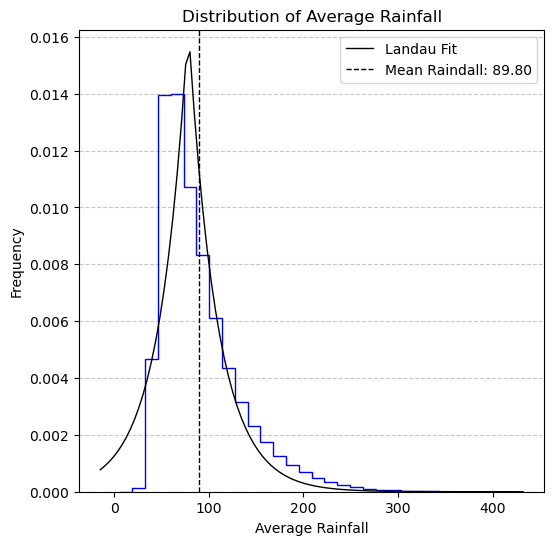

In [26]:
from scipy.stats import laplace
from scipy.optimize import curve_fit

mean = np.mean(df['Rainfall'])

plt.figure(figsize=(6, 6))
plt.hist(df['Rainfall'], bins=30, density=True, edgecolor='blue', histtype='step')

params = laplace.fit(df['Rainfall'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = laplace.pdf(x, loc=params[0], scale=params[1])
plt.plot(x, pdf_fitted, 'k', linewidth=1, label='Landau Fit')


plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Raindall: {mean:.2f}')
plt.title('Distribution of Average Rainfall')
plt.xlabel('Average Rainfall')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper right'))
plt.show()

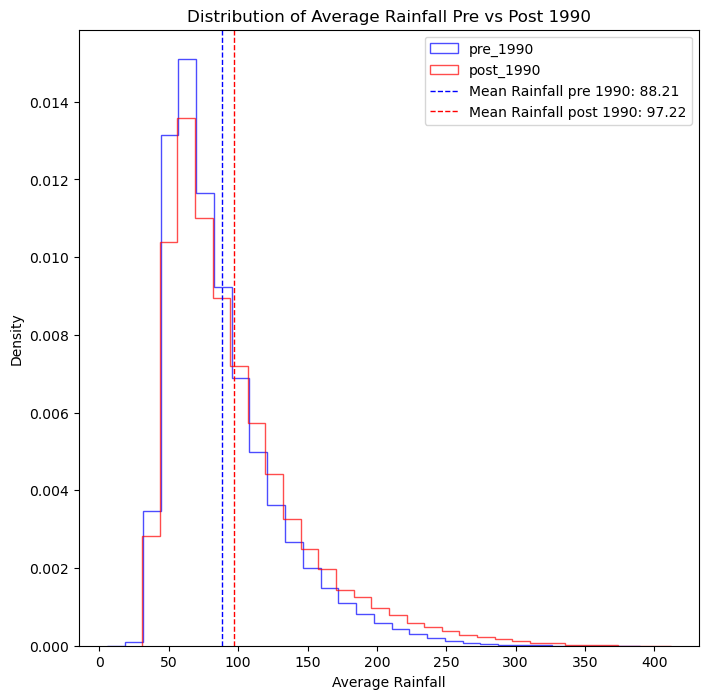

In [27]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Rainfall']
post_1990_data = df[df['Class'] == 'post_1990']['Rainfall']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Rainfall pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Rainfall post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Rainfall Pre vs Post 1990')
plt.xlabel('Average Rainfall')
plt.ylabel('Density')
plt.legend()

plt.show()

## Average Wind

In [32]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [34]:
wind = np.array(data['sfcWind'])
wind_reduced = block_reduce(wind, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind))
wind_annual_mean = wind_reduced.reshape(-1, 1).flatten()

num_years_wind, x, y = wind.shape

years_expanded = np.repeat(np.arange(1969, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Wind Speed': wind_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')

print(df)

      Wind Speed      Class
Year                       
1969    4.882485   pre_1990
1969    4.526714   pre_1990
1969    4.783180   pre_1990
1969    9.064196   pre_1990
1969    9.025033   pre_1990
...          ...        ...
2022    5.392233  post_1990
2022    4.138681  post_1990
2022    3.693334  post_1990
2022    3.989564  post_1990
2022    6.171345  post_1990

[92084 rows x 2 columns]


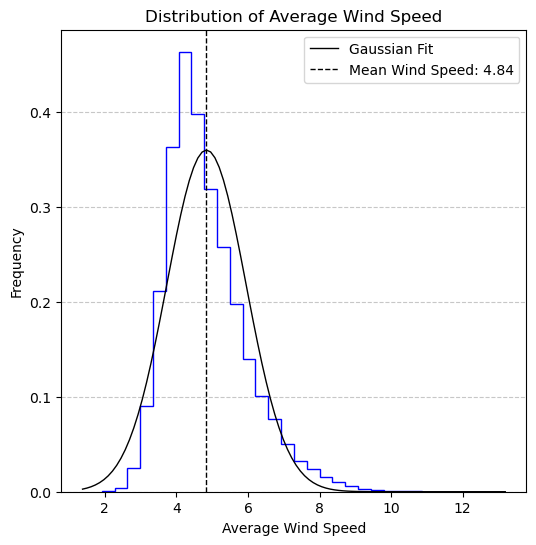

In [36]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Wind Speed'])

plt.figure(figsize=(6, 6))
plt.hist(df['Wind Speed'], bins=30, density=True, edgecolor='blue', histtype='step')

mu, std = norm.fit(df['Wind Speed'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')


plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Wind Speed: {mean:.2f}')
plt.title('Distribution of Average Wind Speed')
plt.xlabel('Average Wind Speed')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper right'))
plt.show()

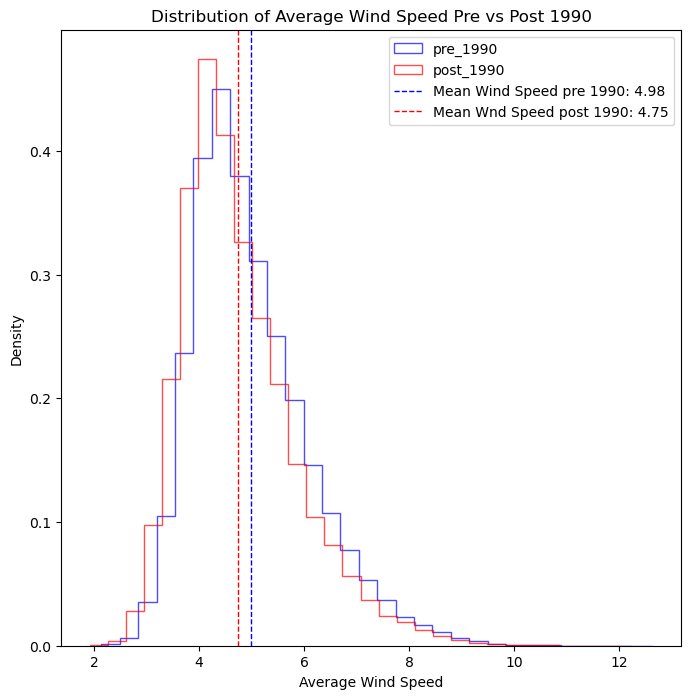

In [37]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Wind Speed']
post_1990_data = df[df['Class'] == 'post_1990']['Wind Speed']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Wind Speed pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Wnd Speed post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Wind Speed Pre vs Post 1990')
plt.xlabel('Average Wind Speed')
plt.ylabel('Density')
plt.legend()

plt.show()

## Humidity

In [39]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)

In [41]:
hurs = np.array(data['hurs'])
hurs_reduced = block_reduce(hurs, block_size=(12, 1, 1), func=np.mean, cval=np.mean(hurs))
hurs_annual_mean = hurs_reduced.reshape(-1, 1).flatten()

num_years_hurs, x, y = hurs.shape

years_expanded = np.repeat(np.arange(1961, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Humidity': hurs_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')
print(df)

       Humidity      Class
Year                      
1961  84.271073   pre_1990
1961  83.839911   pre_1990
1961  83.394722   pre_1990
1961  84.286781   pre_1990
1961  83.849189   pre_1990
...         ...        ...
2022  80.894998  post_1990
2022  80.145657  post_1990
2022  80.142495  post_1990
2022  80.167268  post_1990
2022  81.650351  post_1990

[105834 rows x 2 columns]


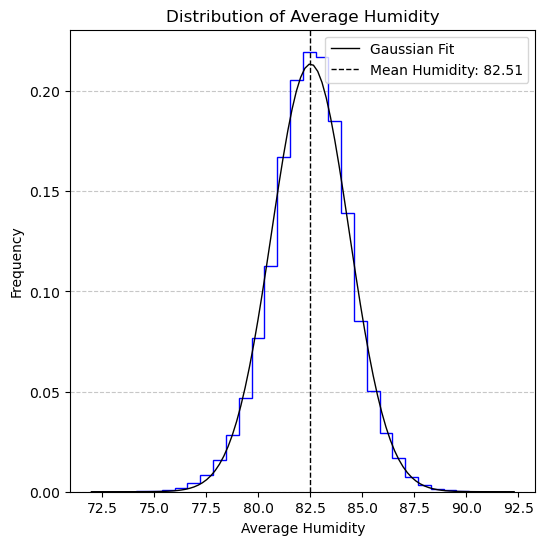

In [42]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Humidity'])

plt.figure(figsize=(6, 6))
plt.hist(df['Humidity'], bins=30, density=True, edgecolor='blue', histtype='step')

mu, std = norm.fit(df['Humidity'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')


plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Humidity: {mean:.2f}')
plt.title('Distribution of Average Humidity')
plt.xlabel('Average Humidity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper right'))
plt.show()

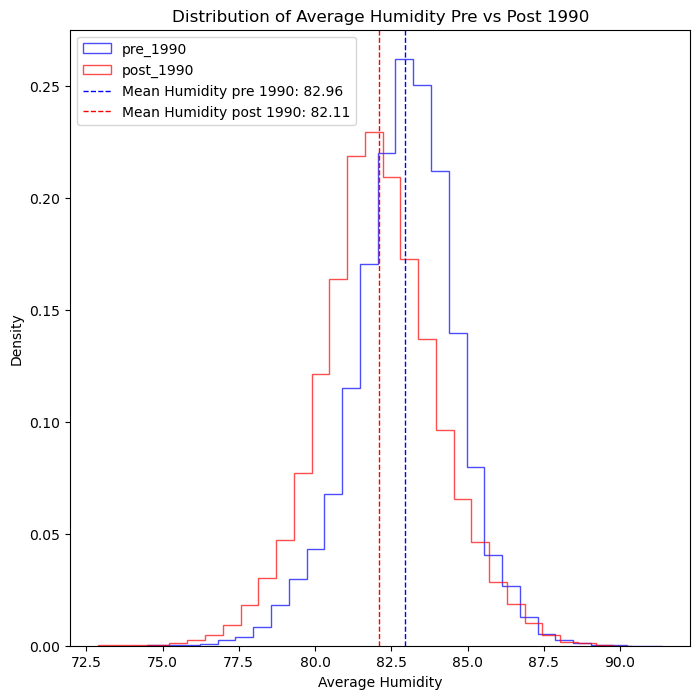

In [43]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Humidity']
post_1990_data = df[df['Class'] == 'post_1990']['Humidity']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Humidity pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Humidity post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Humidity Pre vs Post 1990')
plt.xlabel('Average Humidity')
plt.ylabel('Density')
plt.legend()

plt.show()

## Ground Frost

In [58]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)

In [59]:
frost = np.array(data['groundfrost'])
frost_reduced = block_reduce(frost, block_size=(12, 1, 1), func=np.mean, cval=np.mean(frost))
frost_annual_mean = frost_reduced.reshape(-1, 1).flatten()

num_years_frost, x, y = frost.shape

years_expanded = np.repeat(np.arange(1961, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Frost': frost_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')
print(df)

          Frost      Class
Year                      
1961  11.740864   pre_1990
1961  13.077249   pre_1990
1961  12.984724   pre_1990
1961  11.170667   pre_1990
1961  11.303570   pre_1990
...         ...        ...
2022   6.686898  post_1990
2022   7.098226  post_1990
2022   7.589286  post_1990
2022   7.795562  post_1990
2022   6.264223  post_1990

[105834 rows x 2 columns]


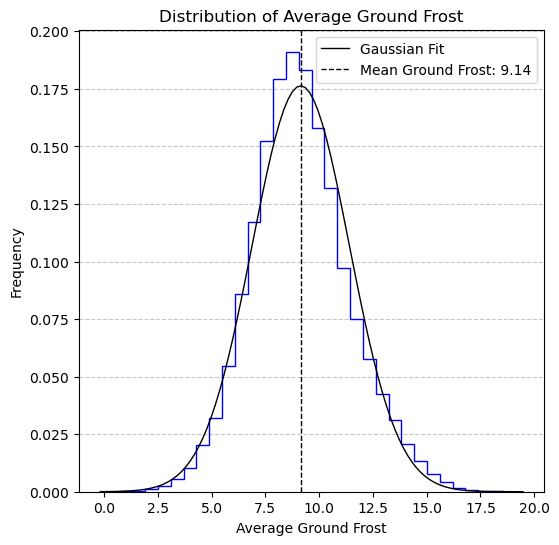

In [60]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Frost'])

plt.figure(figsize=(6, 6))
plt.hist(df['Frost'], bins=30, density=True, edgecolor='blue', histtype='step')

mu, std = norm.fit(df['Frost'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')


plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Ground Frost: {mean:.2f}')
plt.title('Distribution of Average Ground Frost')
plt.xlabel('Average Ground Frost')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper right'))
plt.show()

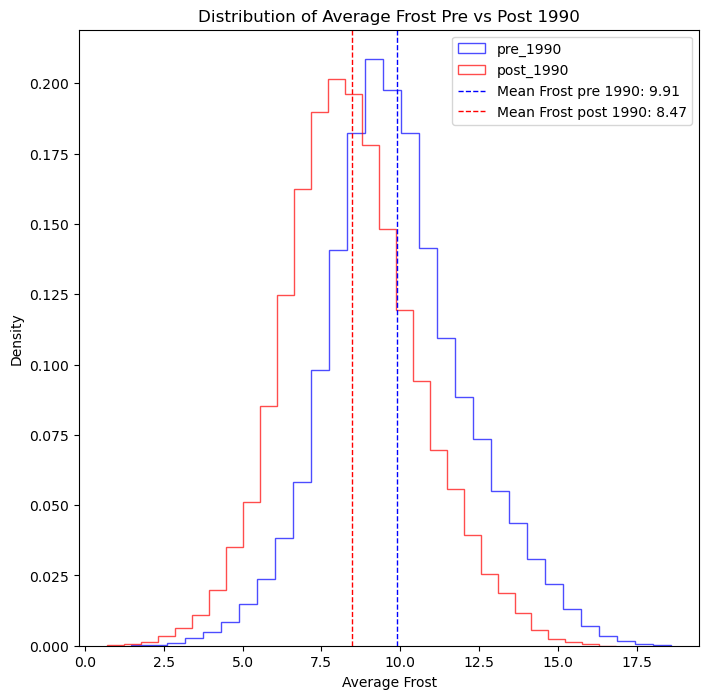

In [61]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Frost']
post_1990_data = df[df['Class'] == 'post_1990']['Frost']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Frost pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Frost post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Frost Pre vs Post 1990')
plt.xlabel('Average Frost')
plt.ylabel('Density')
plt.legend()

plt.show()

## Sunshine

In [64]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)

In [67]:
sun = np.array(data['sun'])
sun_reduced = block_reduce(sun, block_size=(12, 1, 1), func=np.mean, cval=np.mean(sun))
sun_annual_mean = sun_reduced.reshape(-1, 1).flatten()

num_years_sun, x, y = sun.shape

years_expanded = np.repeat(np.arange(1910, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Sun': sun_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')
print(df)

             Sun      Class
Year                       
1910  110.334446   pre_1990
1910  105.335761   pre_1990
1910  101.023641   pre_1990
1910   85.787307   pre_1990
1910   83.701416   pre_1990
...          ...        ...
2022  119.550067  post_1990
2022  131.073536  post_1990
2022  135.298730  post_1990
2022  133.989449  post_1990
2022  109.264229  post_1990

[192891 rows x 2 columns]


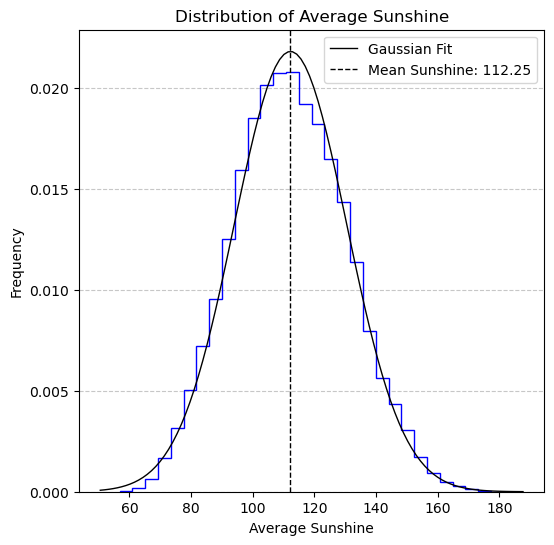

In [68]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Sun'])

plt.figure(figsize=(6, 6))
plt.hist(df['Sun'], bins=30, density=True, edgecolor='blue', histtype='step')

mu, std = norm.fit(df['Sun'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')


plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Sunshine: {mean:.2f}')
plt.title('Distribution of Average Sunshine')
plt.xlabel('Average Sunshine')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper right'))
plt.show()

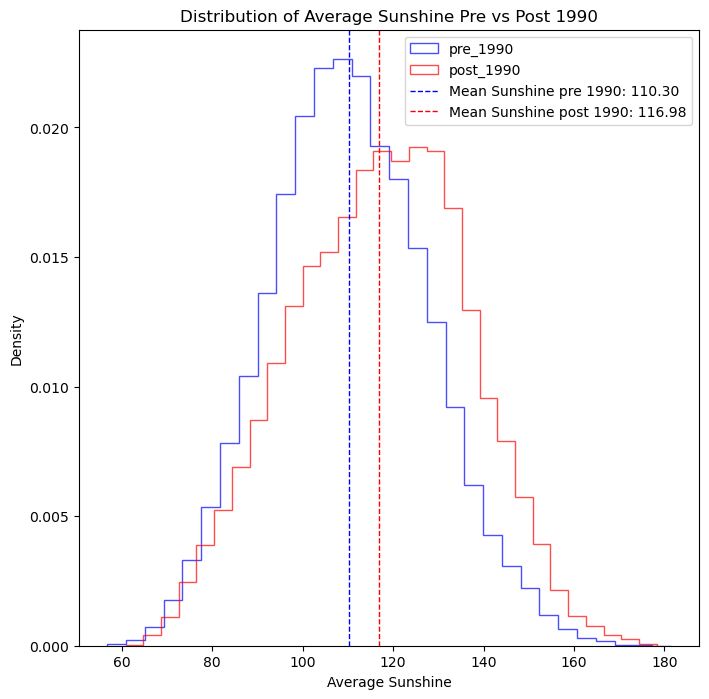

In [70]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Sun']
post_1990_data = df[df['Class'] == 'post_1990']['Sun']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Sunshine pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Sunshine post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Sunshine Pre vs Post 1990')
plt.xlabel('Average Sunshine')
plt.ylabel('Density')
plt.legend()

plt.show()

## Mean Sea Level Pressure

In [73]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import t
from skimage.measure import block_reduce

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)

In [74]:
psl = np.array(data['psl'])
psl_reduced = block_reduce(psl, block_size=(12, 1, 1), func=np.mean, cval=np.mean(psl))
psl_annual_mean = psl_reduced.reshape(-1, 1).flatten()

num_years_psl, x, y = psl.shape

years_expanded = np.repeat(np.arange(1961, 2023), x * y)

data_dict = {
    'Year': years_expanded,
    'Pressure': psl_annual_mean
}

df = pd.DataFrame(data_dict)
df.set_index('Year', inplace=True)
df = df.sort_values(by='Year')
df.dropna(inplace=True)
df['Class'] = df.index.map(lambda year: 'pre_1990' if year < 1990 else 'post_1990')
print(df)

         Pressure      Class
Year                        
1961  1011.258965   pre_1990
1961  1011.213167   pre_1990
1961  1011.136465   pre_1990
1961  1010.236886   pre_1990
1961  1010.166014   pre_1990
...           ...        ...
2022  1015.472549  post_1990
2022  1015.537571  post_1990
2022  1015.557692  post_1990
2022  1015.562395  post_1990
2022  1015.438783  post_1990

[105834 rows x 2 columns]


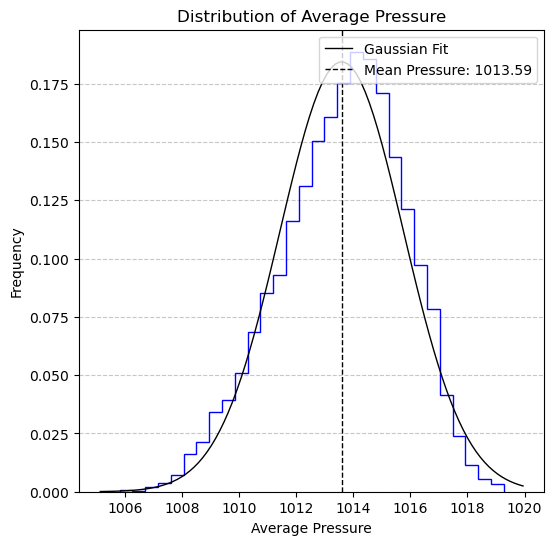

In [75]:
from scipy.stats import norm
from scipy.optimize import curve_fit

mean = np.mean(df['Pressure'])

plt.figure(figsize=(6, 6))
plt.hist(df['Pressure'], bins=30, density=True, edgecolor='blue', histtype='step')

mu, std = norm.fit(df['Pressure'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1, label='Gaussian Fit')


plt.axvline(mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean Pressure: {mean:.2f}')
plt.title('Distribution of Average Pressure')
plt.xlabel('Average Pressure')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc=('upper right'))
plt.show()

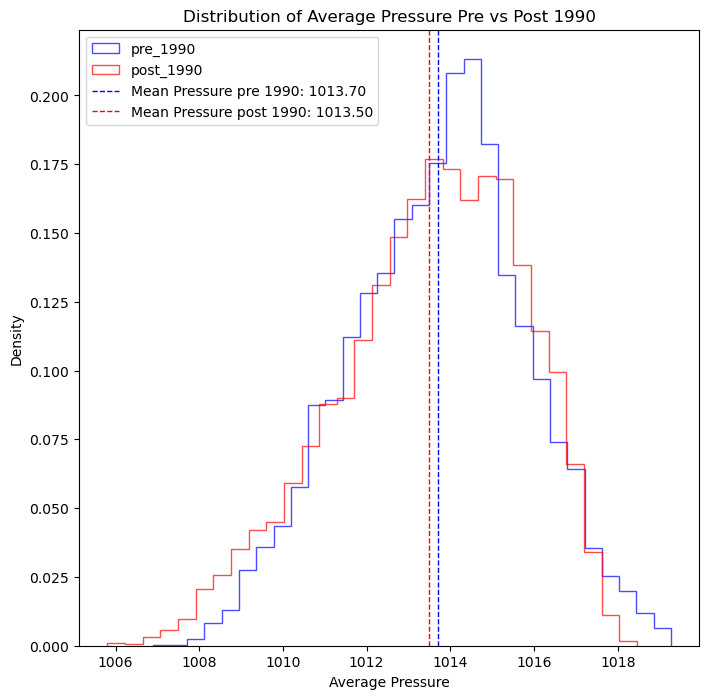

In [76]:
pre_1990_data = df[df['Class'] == 'pre_1990']['Pressure']
post_1990_data = df[df['Class'] == 'post_1990']['Pressure']

mean_pre = np.mean(pre_1990_data)
mean_post = np.mean(post_1990_data)

plt.figure(figsize=(8, 8))
plt.hist(pre_1990_data, bins=30, density=True, alpha=0.7, edgecolor='blue', histtype='step', label='pre_1990')
plt.hist(post_1990_data, bins=30, density=True, alpha=0.7, edgecolor='red', histtype='step', label='post_1990')

plt.axvline(mean_pre, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Pressure pre 1990: {mean_pre:.2f}')
plt.axvline(mean_post, color='red', linestyle='dashed', linewidth=1, label=f'Mean Pressure post 1990: {mean_post:.2f}')
plt.title('Distribution of Average Pressure Pre vs Post 1990')
plt.xlabel('Average Pressure')
plt.ylabel('Density')
plt.legend()

plt.show()